<a href="https://colab.research.google.com/github/leeIITM/AI-X-HORIZON/blob/main/%3Ckutraleeswaran_NH%3E%3Cae23b102%3E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from IPython.display import clear_output

!pip3 install pyprind

clear_output()

# Instructions

* Clone the notebook to your drive.
* The notebook has to be submitted in the form of a link giving us **view access**. Share this link in your application.

* If you still have any queries, you can reach out to the [core team](https://www.notion.so/Club-Contacts-70a4823e0ae34f35a0aa5d479e449915)



# Common Technical Questionnaire


### Question 1

Supervised learning is a type of machine learning where the inputs and outputs are mapped through
a family of equations, the machine learning model essentially picks the right curve to fit the data.
Quantile Regression is a type of supervised learning technique used in statistics and economics. One
advantage of quantile regression relative to ordinary least squares regression is that the quantile
regression estimates are more robust against outliers in the response measurements.

QuantileLossτ (y, ˆy) =
{

                           τ · (y − ˆy) if y > ˆy

                          (1 − τ ) · (ˆy − y) if y ≤ ˆy
}

where τ is Quantile whose value lies between 0 and 1.
Please use this template provided and make changes accordingly for this question alone.
Implement a simple Neural Network consisting of 4 nodes, one hidden layer consisting of 5 nodes
and output layer consisting of two nodes. Perform quantile regression on the model and observe
the loss.
**Bonus: Play around with the value of τ to find what value achieves convergence quicker.**



An example implementation of a simple manual neural network is provided. You may use this as inspiration to complete the task at hand.

In [ ]:
# Imports

import torch

In [2]:
# Imports

import torch

# Initializing the Parameters and the Variables
# y = a*x + b

x = torch.rand((2, 4), requires_grad=False)
y = torch.rand((2, 2), requires_grad=False)

a0 = torch.rand((4, 5), requires_grad=True)     #For the hidden layer
b0 = torch.rand((2, 5), requires_grad=True)

a1 = torch.rand((5,2 ), requires_grad=True)     #For the output layer.    Fill in the dimensions appropriately
b1 = torch.rand((2, ), requires_grad=True)

# Forward Pass 1
y_1 = x@a0+ b0
y_pred1=y_1@a1+b1                                      #Fill in the matrix multiplication equation

quantile=0.2

def loss_function(output, target):
  residual = target - output
  loss = torch.where(residual > 0, quantile * residual, (1 - quantile) * -residual)
  return loss.mean()

# Computing Loss
loss = loss_function(y_pred1, y)
print(loss.item())

# Back Propogation
loss.backward()

# Updating Gradients
with torch.no_grad():
    a0 -= 0.01*a0.grad
    b0 -= 0.01*b0.grad
    a1 -= 0.01*a1.grad
    b1 -= 0.01*b1.grad


# Forward Pass 2
y_2 = x @ a0 + b0
y_pred2= y_2 @ a1 + b1                                      #Fill in the matrix multiplication equation

# Computing Loss
loss = loss_function(y_pred2, y)
print(loss.item())

loss.backward()

# Updating Gradients
with torch.no_grad():
    a0 -= 0.01*a0.grad
    b0 -= 0.01*b0.grad
    a1 -= 0.01*a1.grad
    b1 -= 0.01*b1


# Forward Pass 3
y_3 = x @ a0 +b0                 #Fill in the matrix multiplication equation
y_pred3= y_3 @ a1 + b1

# Computing Loss
loss = loss_function(y_pred3, y)
print(loss.item())

3.60683012008667
3.532010793685913
3.3849873542785645


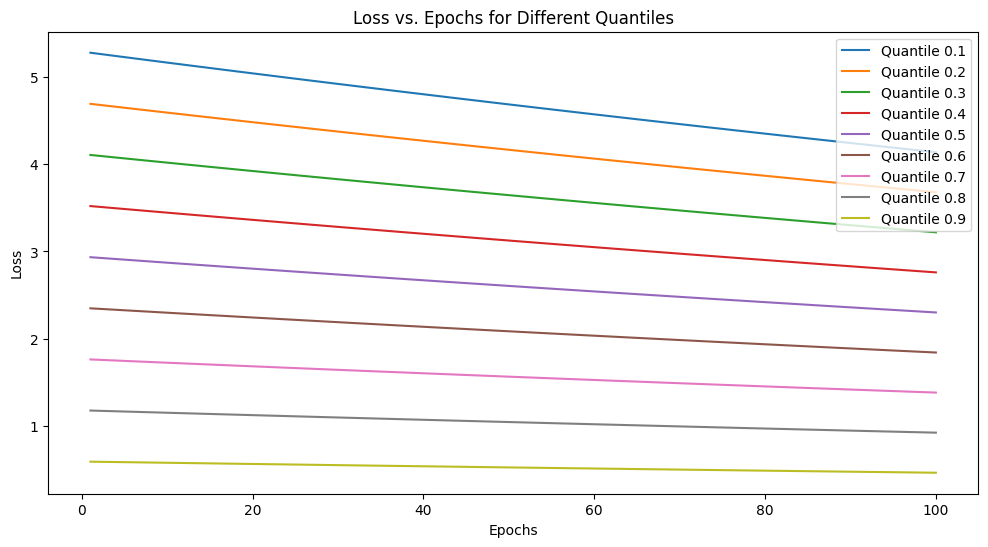

In [3]:
import torch
import matplotlib.pyplot as plt

# Initializing the Parameters and Variables (y = ax + b)
x = torch.rand((2, 4), requires_grad=False)
y = torch.rand((2, 2), requires_grad=False)

a0 = torch.rand((4, 5), requires_grad=True)  # For the hidden layer
b0 = torch.rand((2, 5), requires_grad=True)

a1 = torch.rand((5, 2), requires_grad=True)  # For the output layer (correct dimensions)
b1 = torch.rand((2, 2), requires_grad=True)

# Forward Pass 1
y_1 = torch.matmul(x, a0) + b0  # Matrix multiplication using torch.matmul
y_pred1 = torch.matmul(y_1, a1) + b1  # Matrix multiplication

def loss_function(output, target, quantile):
    # Quantile loss function
    errors = target - output
    loss = torch.max((quantile - 1) * errors, quantile * errors)
    return torch.abs(loss).mean()

# Training parameters
num_epochs = 100
learning_rate = 0.01

# Define range of quantiles to compare
quantiles = [0.1,0.2, 0.3,0.4, 0.5,0.6, 0.7,0.8, 0.9]

# Initialize lists to store losses for each quantile
losses = {q: [] for q in quantiles}

# Training loop
for epoch in range(num_epochs):
    # Forward pass, loss calculation, and backpropagation
    y_1 = torch.matmul(x, a0) + b0
    y_pred = torch.matmul(y_1, a1) + b1

    for q in quantiles:
        loss = loss_function(y_pred, y, quantile=q)
        losses[q].append(loss.item())

    loss.backward()

    # Updating Gradients
    with torch.no_grad():
        a0 -= learning_rate * a0.grad
        b0 -= learning_rate * b0.grad
        a1 -= learning_rate * a1.grad
        b1 -= learning_rate * b1.grad

        # Manually zero the gradients after updating weights
        a0.grad.zero_()
        b0.grad.zero_()
        a1.grad.zero_()
        b1.grad.zero_()

# Plot loss reduction over epochs for each quantile
plt.figure(figsize=(12, 6))
for q in quantiles:
    plt.plot(range(1, num_epochs + 1), losses[q], label=f"Quantile {q}")

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs for Different Quantiles')
plt.legend()
plt.show()